In [247]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

In [269]:
train_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/train.csv')
test_df = pd.read_csv('/Users/aidancurley/Documents/dsir/Submissions/Projects/project_2-master/datasets/test.csv')

Data science is not a linear process. In this project, in particular, you will likely find that EDA, data cleaning, and exploratory visualizations will constantly feed back into each other. Here's an example:

- During basic EDA, you identify many missing values in a column/feature.  
- You consult the data dictionary and use domain knowledge to decide what is meant by this missing feature.  
- You impute a reasonable value for the missing value.  
- You plot the distribution of your feature.  
- You realize what you imputed has negatively impacted your data quality.  
- You cycle back, re-load your clean data, re-think your approach, and find a better solution.  

In [267]:
# Main DF
train_df.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [268]:
train_df['SalePrice']

0       130500
1       220000
2       109000
3       174000
4       138500
         ...  
2046    298751
2047     82500
2048    177000
2049    144000
2050    189000
Name: SalePrice, Length: 2051, dtype: int64

In [207]:
cont_col = ['Lot Area', 'Lot Frontage', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area']

In [250]:
train_df.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [253]:
# DF with only continous values that are linear to 'SalePrice'
continous_df = train_df[['Id', 'Lot Frontage', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area', 'SalePrice']]

In [271]:
test_continous = test_df[['Id', 'Lot Frontage', 'BsmtFin SF 1', 'Total Bsmt SF', '1st Flr SF', 'Gr Liv Area', 'Garage Area']]

In [254]:
continous_df.shape

(2051, 8)

In [255]:
continous_df.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice
0,109,NaN,533.0,725.0,725,1479,475.0,130500


In [256]:
continous_df.isna().sum()

Id                 0
Lot Frontage     330
BsmtFin SF 1       1
Total Bsmt SF      1
1st Flr SF         0
Gr Liv Area        0
Garage Area        1
SalePrice          0
dtype: int64

In [258]:
# Fill na
continous_df['Lot Frontage'].fillna(np.mean(continous_df['Lot Frontage']), inplace=True)

In [275]:
test_continous['Lot Frontage'].fillna(np.mean(continous_df['Lot Frontage']), inplace=True)

In [259]:
# How to get rid of the na values
continous_df['BsmtFin SF 1'].fillna(np.mean(continous_df['BsmtFin SF 1']), inplace=True)

In [260]:
continous_df['Total Bsmt SF'].fillna(np.mean(continous_df['Total Bsmt SF']), inplace = True)

In [261]:
continous_df['Garage Area'].fillna(np.mean(continous_df['Garage Area']), inplace = True)

In [262]:
continous_df.isna().sum()

Id               0
Lot Frontage     0
BsmtFin SF 1     0
Total Bsmt SF    0
1st Flr SF       0
Gr Liv Area      0
Garage Area      0
SalePrice        0
dtype: int64

In [277]:
test_continous.isna().sum()

Id               0
Lot Frontage     0
BsmtFin SF 1     0
Total Bsmt SF    0
1st Flr SF       0
Gr Liv Area      0
Garage Area      0
dtype: int64

In [263]:
continous_df.head(1)

,Id,Lot Frontage,BsmtFin SF 1,Total Bsmt SF,1st Flr SF,Gr Liv Area,Garage Area,SalePrice
0,109,69.0552,533.0,725.0,725,1479,475.0,130500


In [264]:
continous_df.to_csv('continous_df.csv', index=False)

In [278]:
test_continous.to_csv('test_contionus.csv', index=False)

## Function for Continous 

In [46]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    print(f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}")

## Lot Frontage (Continous):

In [58]:
dropped_na = train_df.drop(train_df[train_df['Lot Frontage'].isna()].index)

In [59]:
dropped_na.head(3)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000


In [60]:
# Lot Frontage
dropped_na.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [61]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [62]:
model_contin(dropped_na, 'Lot Frontage') 

MSE is 77488.98085150582


In [124]:
dropped_na = dropped_na[dropped_na['Lot Frontage'] < 250]

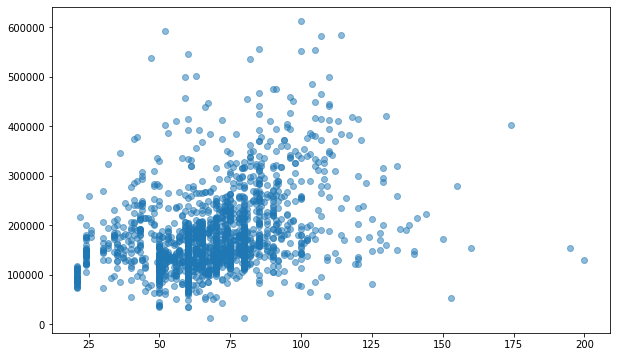

In [126]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_na['Lot Frontage'], dropped_na['SalePrice'], alpha=0.5);

## Lot Area (Continous):

In [51]:
train_df.head(2)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000


In [52]:
train_df[train_df['Lot Area'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
471,2116,906426060,50,RL,NaN,159000,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,Shed,500,6,2007,WD,277000
694,2072,905301050,20,RL,NaN,115149,Pave,NaN,IR2,Low,...,0,0,NaN,NaN,NaN,0,6,2007,WD,302000


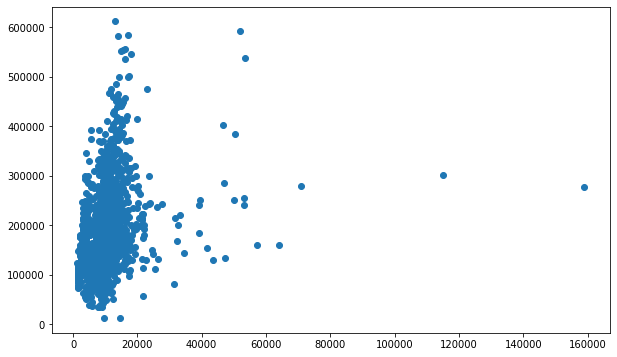

In [67]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Lot Area'], train_df['SalePrice']);

In [53]:
dropped_area = train_df.drop(train_df[train_df['Lot Area'] > 100000].index)

In [54]:
dropped_area.head(1)

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500


In [55]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [56]:
model_contin(dropped_area, 'Lot Area') 

MSE is 74501.74563041469


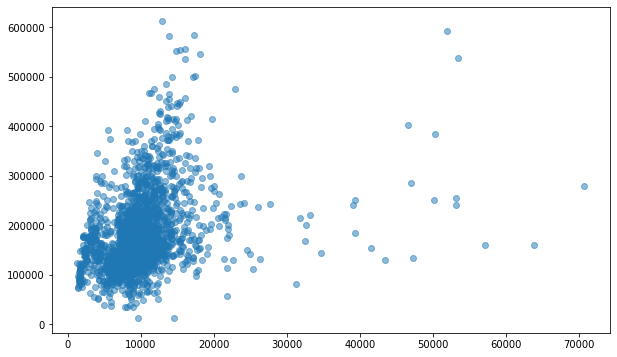

In [127]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_area['Lot Area'], dropped_area['SalePrice'], alpha=0.5);

## Mas Vnr Area (Continous):

In [200]:
train_df['Mas Vnr Area'].isna().sum()

22

In [201]:
dropped_masvnr = train_df.drop(train_df[train_df['Mas Vnr Area'].isna()].index)

In [202]:
dropped_masvnr['Mas Vnr Area'].isna().sum()

0

In [203]:
dropped_masvnr['Mas Vnr Area'].describe()

count    2029.000000
mean       99.695909
std       174.963129
min         0.000000
25%         0.000000
50%         0.000000
75%       161.000000
max      1600.000000
Name: Mas Vnr Area, dtype: float64

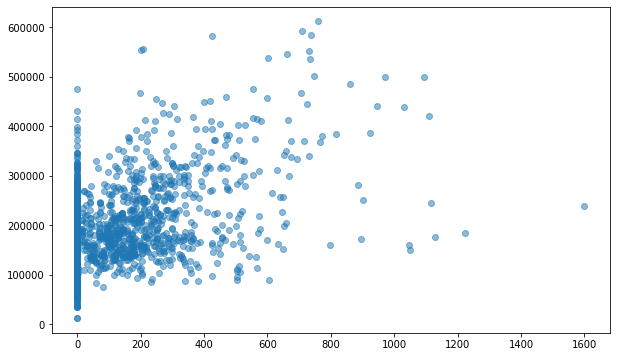

In [205]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_masvnr['Mas Vnr Area'], dropped_masvnr['SalePrice'], alpha=0.5);

## BmstFin SF 1 (Continous):

In [73]:
train_df['BsmtFin SF 1'].isna().sum()

1

In [79]:
dropped_sf1 = train_df.drop(train_df[train_df['BsmtFin SF 1'].isna()].index)

In [80]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [81]:
model_contin(dropped_sf1, 'BsmtFin SF 1') 

MSE is 71770.1229654591


In [130]:
dropped_sf1 = dropped_sf1[dropped_sf1['BsmtFin SF 1'] < 3500]

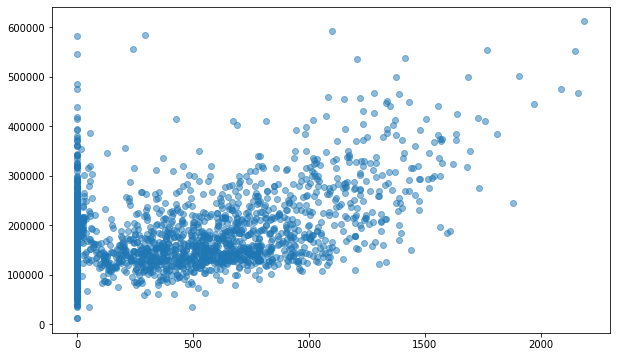

In [131]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_sf1['BsmtFin SF 1'], dropped_sf1['SalePrice'], alpha=0.5);

## BmstFin SF 2 (Continous):

In [82]:
train_df['BsmtFin SF 2'].isna().sum()

1

In [132]:
dropped_bmsf2 = train_df.drop(train_df[train_df['BsmtFin SF 2'].isna()].index)

In [133]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [134]:
model_contin(dropped_bmsf2, 'BsmtFin SF 2') 

MSE is 79215.85737204656


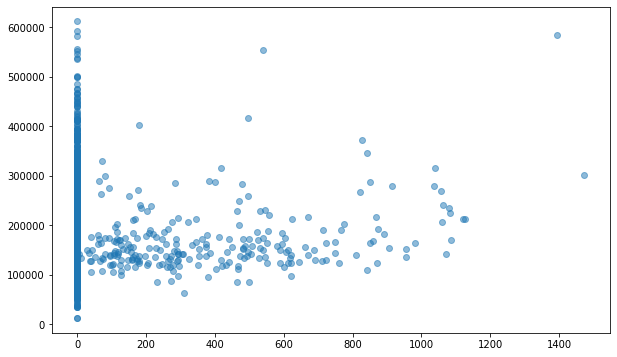

In [136]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_bmsf2['BsmtFin SF 2'], dropped_bmsf2['SalePrice'], alpha=0.5);

## Bsmt Unf Sf (Continous):

In [86]:
train_df['Bsmt Unf SF'].isna().sum()

1

In [95]:
dropped_bmunf = train_df.drop(train_df[train_df['Bsmt Unf SF'].isna()].index)

In [121]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [122]:
model_contin(dropped_bmunf, 'Bsmt Unf SF') 

MSE is 77779.92796108154


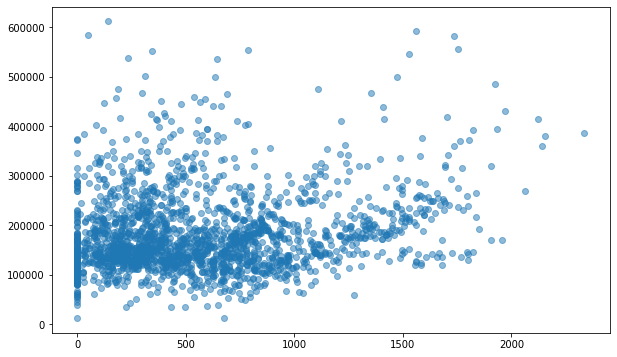

In [150]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_bmunf['Bsmt Unf SF'], dropped_bmunf['SalePrice'], alpha=0.5);

## Total Bsmt SF (Contionus):

In [109]:
train_df['Total Bsmt SF'].isna().sum()

1

In [110]:
dropped_tbmsf = train_df.drop(train_df[train_df['Total Bsmt SF'].isna()].index)

In [111]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [112]:
model_contin(dropped_tbmsf, 'Total Bsmt SF') 

MSE is 61595.791174961276


In [140]:
dropped_tbmsf = dropped_tbmsf[dropped_tbmsf['Total Bsmt SF'] < 4500]

<Figure size 720x720 with 0 Axes>

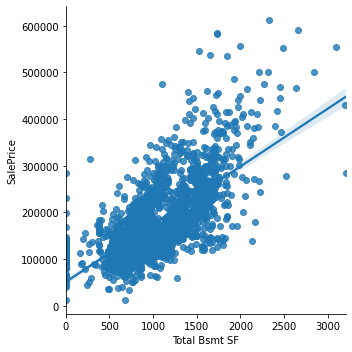

In [148]:
plt.figure(figsize=(10,10))
sns.lmplot(x='Total Bsmt SF',y='SalePrice', data=dropped_tbmsf);

## 1st Flr SF (Continous):

In [16]:
train_df['1st Flr SF'].isna().sum()

0

In [17]:
train_df['1st Flr SF'].describe()

count    2051.000000
mean     1164.488055
std       396.446923
min       334.000000
25%       879.500000
50%      1093.000000
75%      1405.000000
max      5095.000000
Name: 1st Flr SF, dtype: float64

In [43]:
def slr_model(X, y):
#      Step 1: Assemble our X and y variables
#      We need an X matrix that is n-by-p (in this case, p = 1)
#      We need a y vector that is length n
    
#     Instantiate the model
    model = LinearRegression()  
    
#     Fit the model
    model.fit(X, y) 
    
#     Find the coefficient
    score = model.score(X, y)
    
    y_pred = model.predict(X)

#     Take a peek at the model coefficient and intercept
    y_intercept = model.intercept_
    y_coef = model.coef_
    
    print(f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}")
# y_pred, y_intercept, y_coef = slr_model(X, y)
# f"MSE is {metrics.mean_squared_error(y, y_pred, squared=False)}"

In [44]:
def model_contin(dataframe, model_col): 
    model_df = dataframe[['Id', 'SalePrice', model_col]]
    model_X = model_df.drop(columns=['Id','SalePrice'])
    model_y = model_df['SalePrice']
    slr_model(model_X, model_y)

In [45]:
model_contin(train_df, '1st Flr SF') 

MSE is 62265.929310578555


In [153]:
dropped_1stsf = train_df[train_df['1st Flr SF'] < 4300]

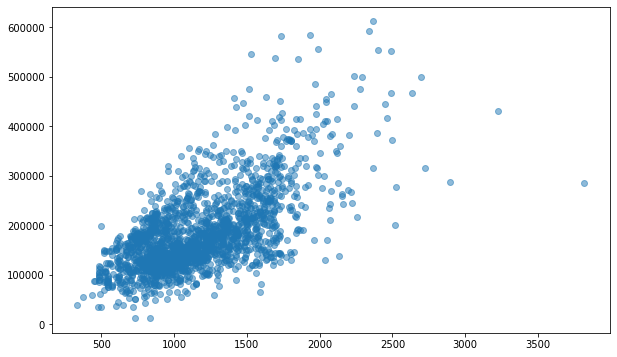

In [154]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_1stsf['1st Flr SF'], dropped_1stsf['SalePrice'], alpha=0.5);

## 2nd Flr SF (Continous):

In [155]:
train_df['2nd Flr SF'].isna().sum()

0

In [160]:
train_df[train_df['2nd Flr SF'] == 0]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
5,138,535126040,20,RL,137.0,16492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,6,2010,WD,190000
6,2827,908186070,180,RM,35.0,3675,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,6,2006,New,140000
7,145,535154050,20,RL,NaN,12160,Pave,NaN,IR1,Lvl,...,0,0,NaN,MnPrv,NaN,0,5,2010,COD,142000
8,1942,535353130,20,RL,NaN,15783,Pave,NaN,Reg,Lvl,...,0,0,NaN,MnPrv,Shed,400,6,2007,WD,112500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2042,2842,909101080,50,RL,45.0,8248,Pave,Grvl,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,9,2006,COD,83000
2045,1051,528102030,20,RL,96.0,12444,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,11,2008,New,394617
2046,1587,921126030,20,RL,79.0,11449,Pave,NaN,IR1,HLS,...,0,0,NaN,NaN,NaN,0,1,2008,WD,298751
2047,785,905377130,30,RL,NaN,12342,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2009,WD,82500


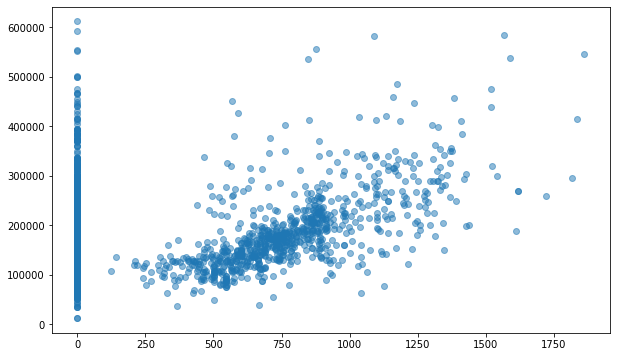

In [159]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['2nd Flr SF'], train_df['SalePrice'], alpha=0.5);

## Low Qual Fin SF (Continous):

In [161]:
train_df['Low Qual Fin SF'].isna().sum()

0

In [162]:
train_df['Low Qual Fin SF'].describe()

count    2051.000000
mean        5.512921
std        51.068870
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max      1064.000000
Name: Low Qual Fin SF, dtype: float64

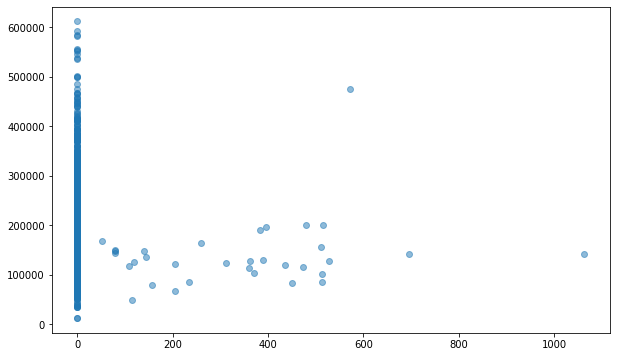

In [163]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Low Qual Fin SF'], train_df['SalePrice'], alpha=0.5);

## Gr Live Area (Continous):

In [164]:
train_df['Gr Liv Area'].isna().sum()

0

In [165]:
train_df['Gr Liv Area'].describe()

count    2051.000000
mean     1499.330083
std       500.447829
min       334.000000
25%      1129.000000
50%      1444.000000
75%      1728.500000
max      5642.000000
Name: Gr Liv Area, dtype: float64

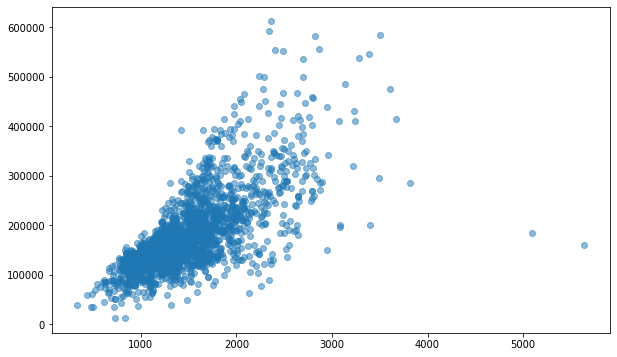

In [166]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Gr Liv Area'], train_df['SalePrice'], alpha=0.5);

## Garage Area (Contionus):

In [173]:
train_df['Garage Area'].isna().sum()

1

In [174]:
dropped_garagearea = train_df.drop(train_df[train_df['Garage Area'].isna()].index)

In [176]:
dropped_garagearea['Garage Area'].isna().sum()

0

In [177]:
dropped_garagearea['Garage Area'].describe()

count    2050.000000
mean      473.671707
std       215.934561
min         0.000000
25%       319.000000
50%       480.000000
75%       576.000000
max      1418.000000
Name: Garage Area, dtype: float64

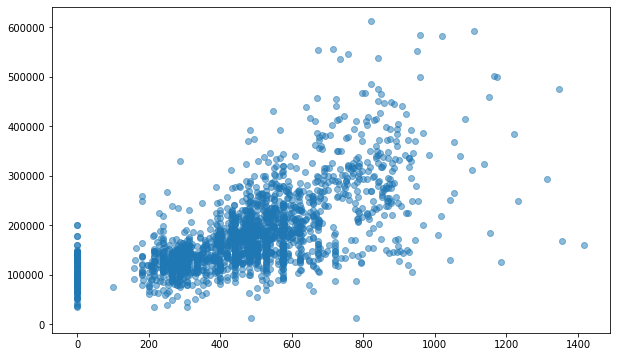

In [178]:
plt.figure(figsize=(10,6))
plt.scatter(dropped_garagearea['Garage Area'], dropped_garagearea['SalePrice'], alpha=0.5);

## Wood Deck SF (Continous):

In [179]:
train_df['Wood Deck SF'].isna().sum()

0

In [180]:
train_df['Wood Deck SF'].describe()

count    2051.000000
mean       93.833740
std       128.549416
min         0.000000
25%         0.000000
50%         0.000000
75%       168.000000
max      1424.000000
Name: Wood Deck SF, dtype: float64

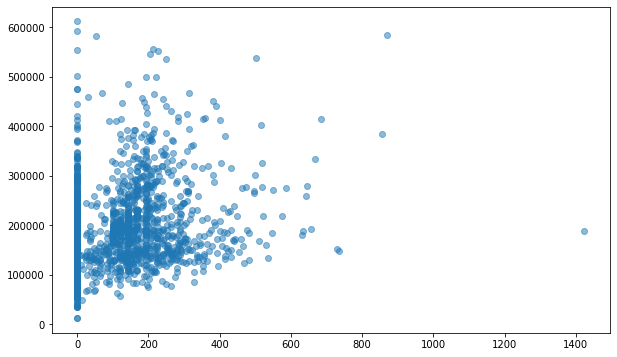

In [181]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Wood Deck SF'], train_df['SalePrice'], alpha=0.5);

## Open Porch SF (Continous):

In [182]:
train_df['Open Porch SF'].isna().sum()

0

In [183]:
train_df['Open Porch SF'].describe()

count    2051.000000
mean       47.556802
std        66.747241
min         0.000000
25%         0.000000
50%        27.000000
75%        70.000000
max       547.000000
Name: Open Porch SF, dtype: float64

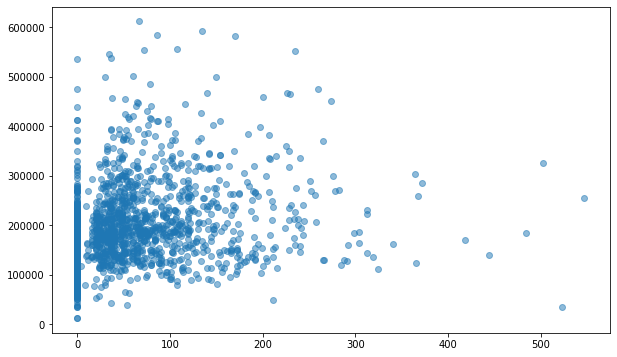

In [184]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Open Porch SF'], train_df['SalePrice'], alpha=0.5);

## Enclosed Porch (Continous):

In [185]:
train_df['Enclosed Porch'].isna().sum()

0

In [186]:
train_df['Enclosed Porch'].describe()

count    2051.000000
mean       22.571916
std        59.845110
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       432.000000
Name: Enclosed Porch, dtype: float64

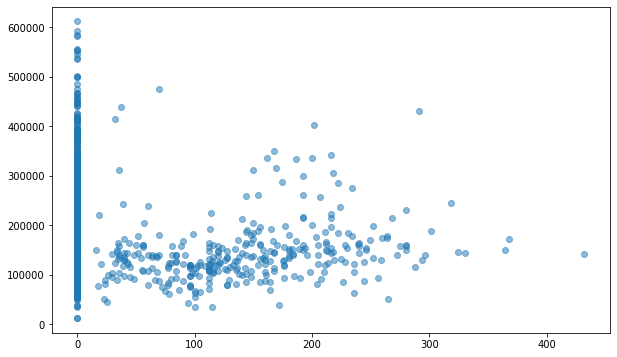

In [187]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Enclosed Porch'], train_df['SalePrice'], alpha=0.5);

## 3-Ssn Porch (Continous):

In [188]:
train_df['3Ssn Porch'].isna().sum()

0

In [189]:
train_df['3Ssn Porch'].describe()

count    2051.000000
mean        2.591419
std        25.229615
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       508.000000
Name: 3Ssn Porch, dtype: float64

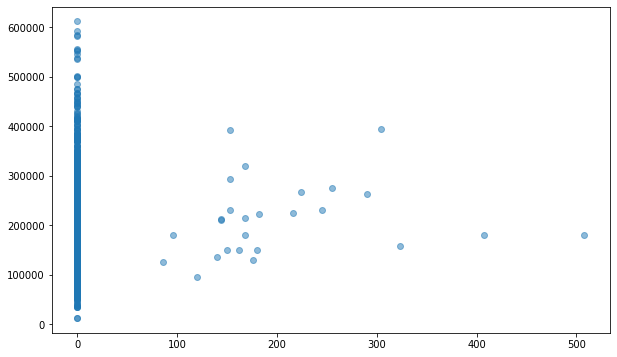

In [190]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['3Ssn Porch'], train_df['SalePrice'], alpha=0.5);

## Screen Porch (Continous):

In [191]:
train_df['Screen Porch'].isna().sum()

0

In [192]:
train_df['Screen Porch'].describe()

count    2051.000000
mean       16.511458
std        57.374204
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       490.000000
Name: Screen Porch, dtype: float64

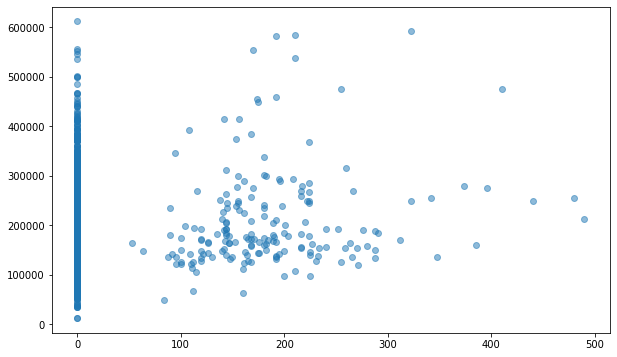

In [193]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Screen Porch'], train_df['SalePrice'], alpha=0.5);

## Pool Area (Continous):

In [194]:
train_df['Pool Area'].isna().sum()

0

In [195]:
train_df['Pool Area'].describe()

count    2051.000000
mean        2.397855
std        37.782570
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool Area, dtype: float64

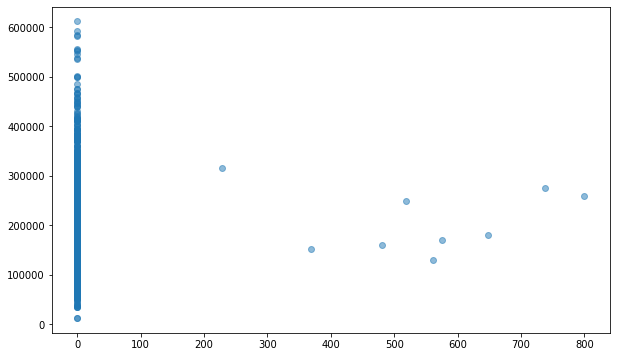

In [196]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Pool Area'], train_df['SalePrice'], alpha=0.5);

## Misc Val (Continous):

In [197]:
train_df['Misc Val'].isna().sum()

0

In [198]:
train_df['Misc Val'].describe()

count     2051.000000
mean        51.574354
std        573.393985
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      17000.000000
Name: Misc Val, dtype: float64

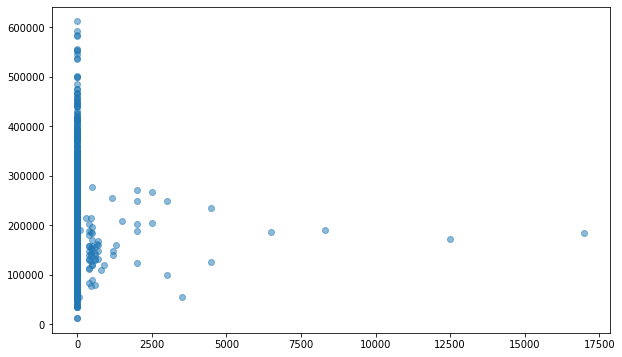

In [199]:
plt.figure(figsize=(10,6))
plt.scatter(train_df['Misc Val'], train_df['SalePrice'], alpha=0.5);

In [405]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice'])

In [406]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice'])

In [407]:
# plt.figure(figsize=(10,6))
# plt.scatter(train_df['BsmtFin SF 1'], train_df['SalePrice'])